# Min Max Hill Climbing

## Library imports

In [ ]:
# Install statements

# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [7]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

## Data Preprocessing

In [2]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Datasets/Dataset_Coeff_Estimation.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,-0.21712,-1.18084,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,-0.71126,-0.21575,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,-1.37983,0.40148,6,3,0
18-24,0,Masters degree,34,34,46,47,46,-1.37983,-1.18084,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,-0.21712,-0.21575,6,3,0
65+,0,Left school at 18,29,38,35,55,52,-1.37983,-1.54858,6,0,0


In [3]:
# After experimentation with and without ordering the class labels,
# We decided to order them because this resulted in more expressive path coefficients

df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

# Age and Education have a certain ordinal ordering which we will make use of:

df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [4]:
# Inspecting the datatypes present in the dataframe

print("Train dataset specifications:")
str(df)

[1] "Train dataset specifications:"
'data.frame':	1885 obs. of  13 variables:
 $ Age              : Ord.factor w/ 6 levels "18-24"<"25-34"<..: 3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : int  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : Ord.factor w/ 9 levels "Left school before 16"<..: 6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  -0.217 -0.711 -1.38 -1.38 -0.217 ...
 $ Sensation_seeking: num  -1.181 -0.216 0.401 -1.181 -0.216 ...
 $ Caffeine         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 4 1 1 

In [12]:
# Apparently doubles are the new big happy

df$Gender <- as.double(df$Gender) 
df$Nscore <- as.double(df$Nscore) 
df$Escore <- as.double(df$Escore) 
df$Oscore <- as.double(df$Oscore) 
df$Ascore <- as.double(df$Ascore) 
df$Cscore <- as.double(df$Cscore) 

## Model creation


  Bayesian network learned via Hybrid methods

  model:
   [Age][Nscore][Caffeine][Education|Age][Cscore|Nscore][Cannabis|Age]
   [Impulsive|Cscore][Meth|Cannabis][Sensation_seeking|Impulsive]
   [Gender|Nscore:Sensation_seeking][Oscore|Sensation_seeking]
   [Escore|Nscore:Oscore:Cscore:Sensation_seeking][Ascore|Gender:Nscore:Cscore]
  nodes:                                 13 
  arcs:                                  16 
    undirected arcs:                     0 
    directed arcs:                       16 
  average markov blanket size:           3.23 
  average neighbourhood size:            2.46 
  average branching factor:              1.23 

  learning algorithm:                    Max-Min Hill-Climbing 
  constraint-based method:               Max-Min Parent Children 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  score-based method:                    Hill-Climbing 
  score:                                 BIC (cond. Gauss.) 
  alpha threshold: 

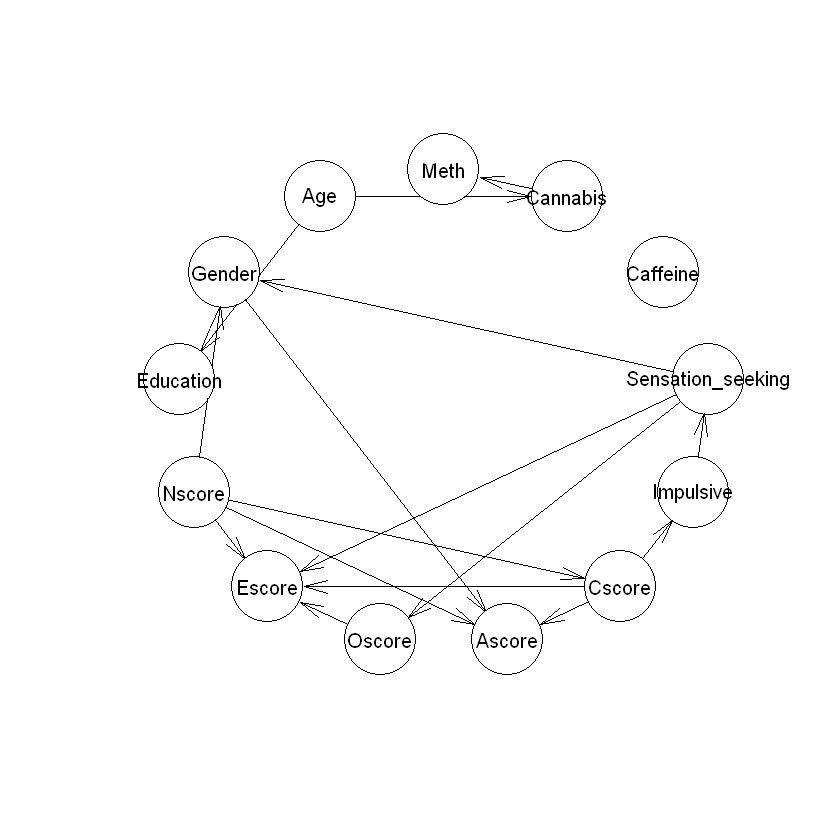

In [16]:
# Without constraints, there are some things here that are looking a bit off though.... Nothing should be able to influence Age or gender

unconstrained_fit <- mmhc(df)
plot(unconstrained_fit)
unconstrained_fit

In [14]:
# Let's make some assumptions about our data (see assignment 1)

loops <- data.frame(
  "from" = c(
             rep("Escore",6), 
             rep("Oscore",6), 
             rep("Ascore",6), 
             rep("Cscore",6), 
             rep("Nscore",6),
             rep("Sensation_seeking",7),
             rep("Impulsive",7),
             rep("Education",9),
             rep("Caffeine",12),
             rep("Cannabis",12),
             rep("Meth",12)

             ),
  "to" = c(
           "Oscore", "Ascore", "Cscore","Nscore", "Age", "Gender",
           "Escore", "Ascore", "Cscore","Nscore", "Age", "Gender",
           "Escore","Oscore","Cscore","Nscore", "Age", "Gender",
           "Escore","Oscore","Ascore","Nscore", "Age", "Gender",
           "Oscore","Ascore","Cscore","Escore", "Age", "Gender",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education", "Cannabis", "Meth",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education", "Caffeine", "Meth",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education", "Cannabis", "Caffeine"
           ))
loops

from,to
Escore,Oscore
Escore,Ascore
Escore,Cscore
Escore,Nscore
Escore,Age
Escore,Gender
Oscore,Escore
Oscore,Ascore
Oscore,Cscore
Oscore,Nscore



  Bayesian network learned via Hybrid methods

  model:
   [Age][Gender][Escore][Oscore][Cscore][Caffeine][Meth][Education|Age]
   [Nscore|Gender][Ascore|Gender][Sensation_seeking|Gender:Escore:Oscore]
   [Cannabis|Age][Impulsive|Cscore:Sensation_seeking]
  nodes:                                 13 
  arcs:                                  9 
    undirected arcs:                     0 
    directed arcs:                       9 
  average markov blanket size:           2.00 
  average neighbourhood size:            1.38 
  average branching factor:              0.69 

  learning algorithm:                    Max-Min Hill-Climbing 
  constraint-based method:               Max-Min Parent Children 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  score-based method:                    Hill-Climbing 
  score:                                 BIC (cond. Gauss.) 
  alpha threshold:                       0.05 
  penalization coefficient:              3.770842 
  t

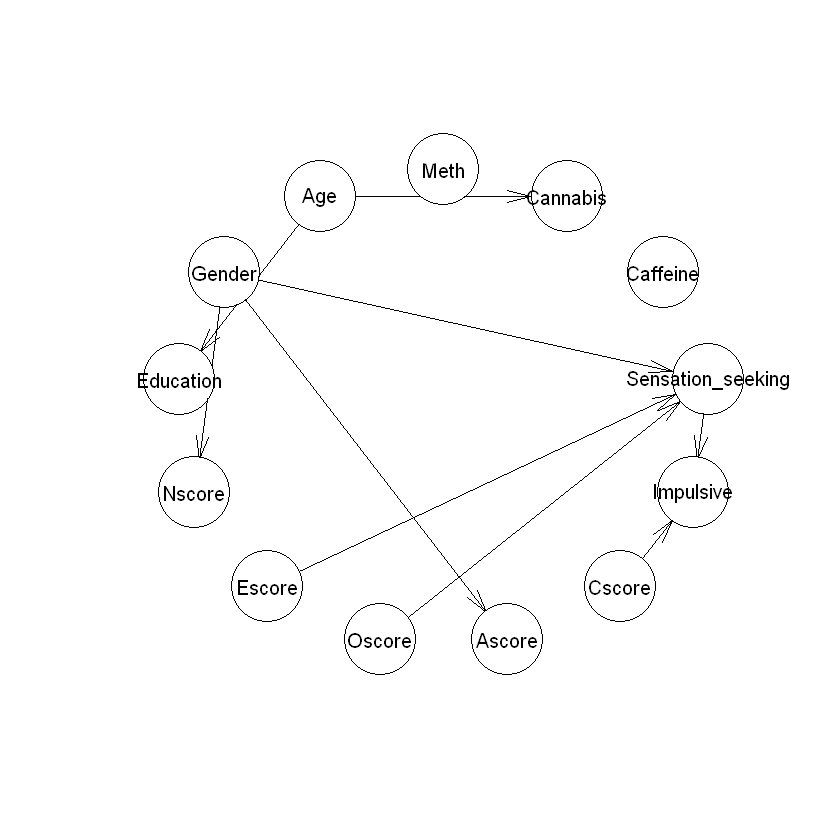

In [15]:
# We are going to need to make this less aggressive in the future 
# Whitelisting drug interactions, and score interactions

fit_constraint_based <- mmhc(df, blacklist = loops)
plot(fit_constraint_based)
fit_constraint_based

In [28]:
# Let's make some assumptions about our data (see assignment 1) - Less aggressive this time

loops2 <- data.frame(
  "from" = c(
             rep("Escore",2), 
             rep("Oscore",2), 
             rep("Ascore",2), 
             rep("Cscore",2), 
             rep("Nscore",2),
             rep("Sensation_seeking",2),
             rep("Impulsive",2),
             rep("Education",9),
             rep("Caffeine",10),
             rep("Cannabis",10),
             rep("Meth",10)

             ),
  "to" = c(
           "Age", "Gender",
           "Age", "Gender",
           "Age", "Gender",
           "Age", "Gender",
           "Age", "Gender",
           "Age", "Gender",
           "Age", "Gender",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education",
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education"
           ))
loops

from,to
Escore,Oscore
Escore,Ascore
Escore,Cscore
Escore,Nscore
Escore,Age
Escore,Gender
Oscore,Escore
Oscore,Ascore
Oscore,Cscore
Oscore,Nscore



  Bayesian network learned via Hybrid methods

  model:
   [Age][Gender][Caffeine][Education|Age][Nscore|Gender][Cannabis|Age]
   [Ascore|Gender:Nscore][Meth|Cannabis][Cscore|Nscore:Ascore][Impulsive|Cscore]
   [Sensation_seeking|Gender:Impulsive][Oscore|Sensation_seeking]
   [Escore|Nscore:Oscore:Cscore:Sensation_seeking]
  nodes:                                 13 
  arcs:                                  16 
    undirected arcs:                     0 
    directed arcs:                       16 
  average markov blanket size:           3.23 
  average neighbourhood size:            2.46 
  average branching factor:              1.23 

  learning algorithm:                    Max-Min Hill-Climbing 
  constraint-based method:               Max-Min Parent Children 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  score-based method:                    Hill-Climbing 
  score:                                 BIC (cond. Gauss.) 
  alpha threshold:            

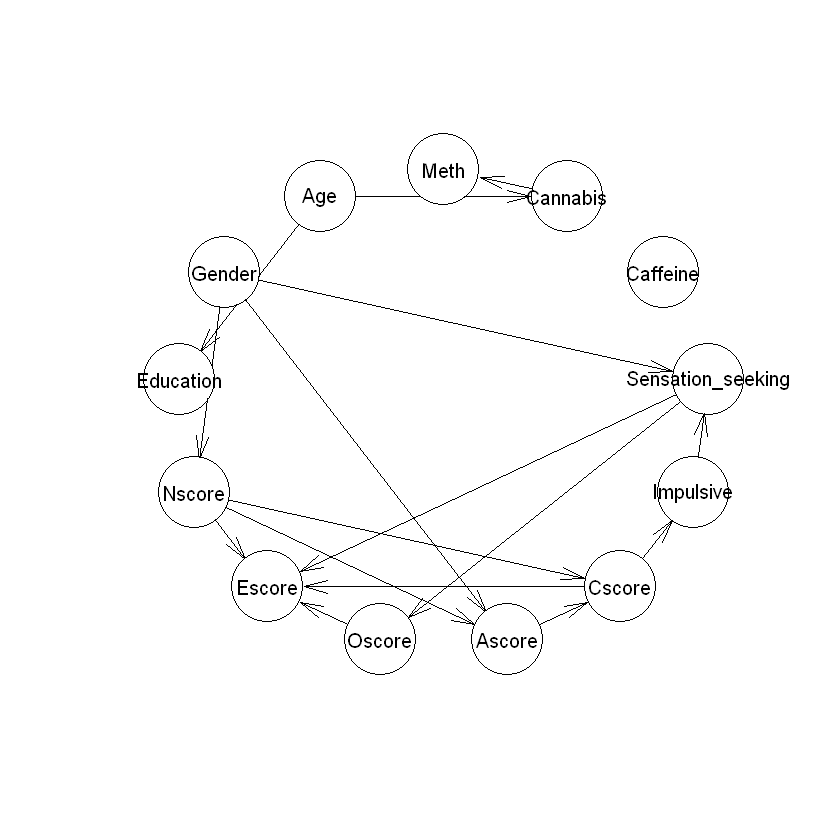

In [29]:
# Less aggressive gives more interesting results if you ask me

fit_less_constraint_based <- mmhc(df, blacklist = loops2)
plot(fit_less_constraint_based)
fit_less_constraint_based

## Score testing / Model comparison

In [37]:
# The default score is BIC if I interpretted the documentation correctly - This makes the 3 commented line error weird though..

print("BIC: unconstrained_fit")

score(unconstrained_fit, df)

print("BIC: fit_constraint_based")

score(fit_constraint_based, df)

print("BIC: fit_less_constraint_based")

score(fit_less_constraint_based, df)


# score(fit_less_constraint_based, df, type = "bic") # This gives a strange error stating it only works for Discrete?
# score(fit_less_constraint_based, df, type = "aic") # This gives a strange error stating it only works for Discrete?
# score(fit_less_constraint_based, df, type = "bde") # This gives a strange error stating it only works for Discrete?

[1] "BIC: unconstrained_fit"


[1] -50258.24

[1] "BIC: fit_constraint_based"


[1] -50899.81

[1] "BIC: fit_less_constraint_based"


[1] -50273.52

## Path Coefficients

### Everything below is an experiment that did not work out ... YET!

In [17]:
# Creating the cor matrix and visually inspecting it

M <- lavCor(df)
M

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
Age,1.00000000,-0.12196667,0.17546243,-0.15046761,-0.02788125,-0.23929895,0.07019570,0.211937645,-0.20496263,-0.35006985,0.142989079,-0.47637466,-0.26129642
Gender,-0.12196667,1.00000000,-0.20129931,-0.07039285,-0.06116698,0.13599424,-0.22038676,-0.183906636,0.16749166,0.24427660,0.010175866,0.30915512,0.24514444
Education,0.17546243,-0.20129931,1.00000000,-0.10283732,0.12035190,0.06496818,0.09246585,0.245952853,-0.13597674,-0.13458276,0.056165131,-0.26896354,-0.22922808
Nscore,-0.15046761,-0.07039285,-0.10283732,1.00000000,-0.43296725,0.01662559,-0.21514520,-0.398678551,0.17722595,0.08466570,0.020492632,0.10900993,0.24810640
Escore,-0.02788125,-0.06116698,0.12035190,-0.43296725,1.00000000,0.23606577,0.15906490,0.318780114,0.10804309,0.20457370,0.044232070,-0.02543117,-0.15833390
Oscore,-0.23929895,0.13599424,0.06496818,0.01662559,0.23606577,1.00000000,0.03280548,-0.059995922,0.27441450,0.41986449,-0.002071750,0.42945186,0.24465898
Ascore,0.07019570,-0.22038676,0.09246585,-0.21514520,0.15906490,0.03280548,1.00000000,0.249608607,-0.23174009,-0.21242041,-0.013683783,-0.16369100,-0.20534460
Cscore,0.21193765,-0.18390664,0.24595285,-0.39867855,0.31878011,-0.05999592,0.24960861,1.000000000,-0.34225017,-0.23258588,-0.004265342,-0.29270898,-0.25711483
Impulsive,-0.20496263,0.16749166,-0.13597674,0.17722595,0.10804309,0.27441450,-0.23174009,-0.342250166,1.00000000,0.62311964,0.028282154,0.32288619,0.25227689
Sensation_seeking,-0.35006985,0.24427660,-0.13458276,0.08466570,0.20457370,0.41986449,-0.21242041,-0.232585875,0.62311964,1.00000000,0.017958549,0.47202827,0.29704230


In [27]:
# Extracting the coordinates

cg <- coordinates(fit_constraint_based)

# Hmmm this is not looking too hot

cg


# Fitting the graph with training data and our cov matrix

# fit <- lavaan( toString(fit_constraint_based,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML",auto.var=TRUE) # Estimating using maximum likelihood

# Summary of the fit

# summary(fit)

$x
   
NA 

$y
   
NA

$x
   
NA 

$y
   
NA

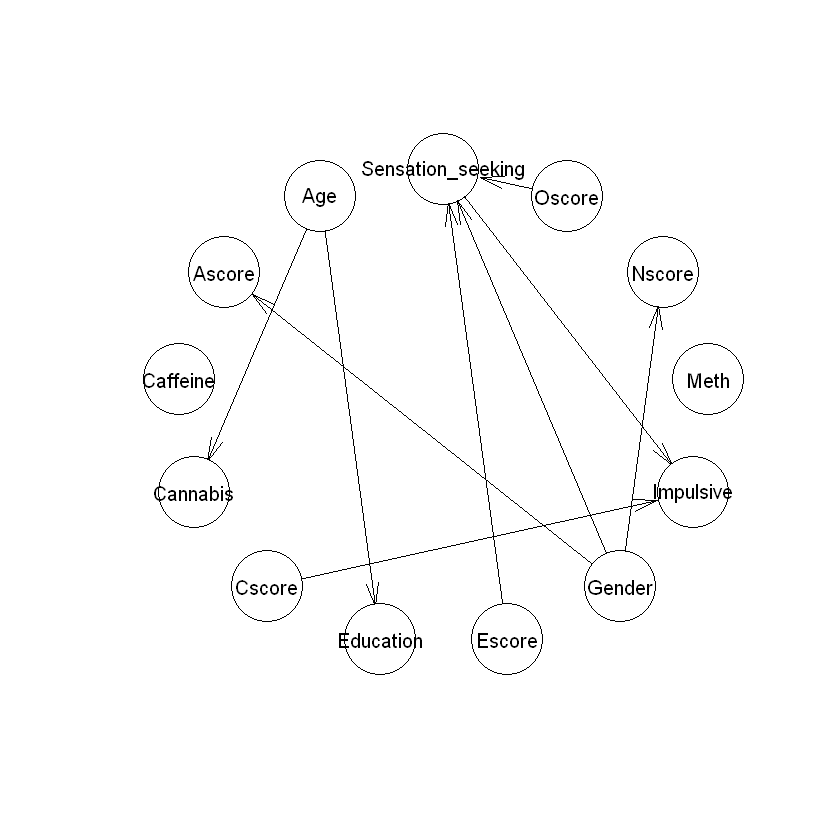

In [25]:
network <- model2network(toString(fit_constraint_based,"bnlearn"))
plot(network)
cg <- coordinates(network)
cg